In [7]:
import scipy.io
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
path_snow = r'C:\Users\subed042\Desktop\Group_project\Data_mining\balanced_snow_dictionary.mat'
path_coast = r'C:\Users\subed042\Desktop\Group_project\Data_mining\balanced_coast_dictionary.mat'
path_land = r'C:\Users\subed042\Desktop\Group_project\Data_mining\balanced_land_dictionary.mat'
path_ocean = r'C:\Users\subed042\Desktop\Group_project\Data_mining\balanced_ocean_dictionary.mat'
path_seaIce = r'C:\Users\subed042\Desktop\Group_project\Data_mining\balanced_seaIce_dictionary.mat'

mat_snow = scipy.io.loadmat(path_snow)
mat_coast = scipy.io.loadmat(path_coast)
mat_land = scipy.io.loadmat(path_land)
mat_ocean = scipy.io.loadmat(path_ocean)
mat_seaIce = scipy.io.loadmat(path_seaIce)


matrix_dic_snow = mat_snow['dic_snow'] # for others use dic_land, dic_ice, dic_ocean, dic_coast, dic_sc
matrix_dic_land = mat_land['dic_land']
matrix_dic_seaIce = mat_seaIce['dic_seaIce']
matrix_dic_ocean = mat_ocean['dic_ocean']
matrix_dic_coast = mat_coast['dic_coast']


# Convert the matrix data to a Pandas DataFrame
df_dic_snow = pd.DataFrame(matrix_dic_snow) # load dictionary for different surface type and store it into differet dataframe
df_dic_land = pd.DataFrame(matrix_dic_land)
df_dic_seaIce = pd.DataFrame(matrix_dic_seaIce)
df_dic_ocean = pd.DataFrame(matrix_dic_ocean)
df_dic_coast = pd.DataFrame(matrix_dic_coast)

In [8]:
rows_to_keep = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 29] # I have put the input features in the rows
#and only the rows with given rows index will be used for our model
df_req_dic_snow = df_dic_snow.iloc[rows_to_keep]
df_req_dic_land = df_dic_land.iloc[rows_to_keep]
df_req_dic_seaIce = df_dic_seaIce.iloc[rows_to_keep]
df_req_dic_ocean = df_dic_ocean.iloc[rows_to_keep]
df_req_dic_coast = df_dic_coast.iloc[rows_to_keep]

In [9]:
df_req_dic_coast.iloc[13].unique() # This rows give information about precipitation phase. 0 = no_precip, 3= rain, 5= snow

array([0., 5., 3.])

In [10]:
df_req_dic_snow.iloc[13] = df_req_dic_snow.iloc[13].replace({3.0: 1, 5.0: 2}) # Modifying the index so 1 = rain, 2=snow
df_req_dic_land.iloc[13] = df_req_dic_land.iloc[13].replace({3.0: 1, 5.0: 2})
df_req_dic_seaIce.iloc[13] = df_req_dic_seaIce.iloc[13].replace({3.0: 1, 5.0: 2})
df_req_dic_ocean.iloc[13] = df_req_dic_ocean.iloc[13].replace({3.0: 1, 5.0: 2})
df_req_dic_coast.iloc[13] = df_req_dic_coast.iloc[13].replace({3.0: 1, 5.0: 2})

In [11]:
# we are providing the name to the input features. They are the information measured by the differnt frequencies that
# helps to determine the precipitation phase
variables = ['10v_BT', '10h_BT', '18v_BT', '18h_BT', '23v_BT', '36v_BT', '36h_BT', '89v_BT', '89h_BT', '166v_BT', '166h_BT', '183-3_BT','183-7_BT', 'precip_flag','pr_rate_nearSurf']
df_req_dic_snow.loc[:, 'variable'] = variables
df_req_dic_land.loc[:, 'variable'] = variables
df_req_dic_seaIce.loc[:, 'variable'] = variables
df_req_dic_ocean.loc[:, 'variable'] = variables
df_req_dic_coast.loc[:, 'variable'] = variables


df_req_dic_snow.set_index('variable', inplace=True)
df_req_dic_land.set_index('variable', inplace=True)
df_req_dic_seaIce.set_index('variable', inplace=True)
df_req_dic_ocean.set_index('variable', inplace=True)
df_req_dic_coast.set_index('variable', inplace=True)


# If you find missing data, delete the entire column. If the data of one input feature is missing, data of other features at
#that instant is of no use
df_req_dic_snow = df_req_dic_snow.dropna(axis=1)
df_req_dic_land = df_req_dic_land.dropna(axis=1)
df_req_dic_seaIce = df_req_dic_seaIce.dropna(axis=1)
df_req_dic_ocean = df_req_dic_ocean.dropna(axis=1)
df_req_dic_coast = df_req_dic_coast.dropna(axis=1)


#I am transposing it for the proper visualization
df_req_dic_snow = df_req_dic_snow.T
df_req_dic_land = df_req_dic_land.T
df_req_dic_seaIce = df_req_dic_seaIce.T
df_req_dic_ocean = df_req_dic_ocean.T
df_req_dic_coast = df_req_dic_coast.T

Now, you can start training the model. Create the datafrmae like this for the different surface type and evaluate the classifiers for each surface type. At the last, you can concatenate all the dataframe and can train the model on the whole data at once and see whether land surface classification increase model performance or not.

## Here is the Demo code that shows you How I trained xtreme gradient boosting decision tree for the phase prediction

## Fit model for snow

In [13]:
# Now its time to train the model
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
X = df_req_dic_snow[['10v_BT', '10h_BT', '18v_BT', '18h_BT', '23v_BT', '36v_BT', '36h_BT', '89v_BT', '89h_BT', '166v_BT', '166h_BT', '183-3_BT', '183-7_BT']]
y = df_req_dic_snow['precip_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create an XGBoost classifier with 200 weak learners
model = XGBClassifier(n_estimators=5000)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract TP, TN, FP, FN for labels 1 and 2
TP_1 = conf_matrix[1, 1]  # True Positive for label 1
TN_1 = conf_matrix[0, 0] + conf_matrix[0, 2] + conf_matrix[2, 0] + conf_matrix[2, 2]  # True Negative for label 1
FP_1 = conf_matrix[0, 1] + conf_matrix[2, 1]  # False Positive for label 1
FN_1 = conf_matrix[1, 0] + conf_matrix[1, 2]  # False Negative for label 1

TP_2 = conf_matrix[2, 2]  # True Positive for label 2
TN_2 = conf_matrix[0, 0] + conf_matrix[0, 1] + conf_matrix[1, 0] + conf_matrix[1, 1]  # True Negative for label 2
FP_2 = conf_matrix[0, 2] + conf_matrix[1, 2]  # False Positive for label 2
FN_2 = conf_matrix[2, 0] + conf_matrix[2, 1]  # False Negative for label 2

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR) for labels 1 and 2
TPR_1 = TP_1 / (TP_1 + FN_1)
FPR_1 = FP_1 / (FP_1 + TN_1)

TPR_2 = TP_2 / (TP_2 + FN_2)
FPR_2 = FP_2 / (FP_2 + TN_2)

# Print the results
print(f"Label 1 - TPR: {TPR_1}, FPR: {FPR_1}")
print(f"Label 2 - TPR: {TPR_2}, FPR: {FPR_2}")

Label 1 - TPR: 0.9344790547798066, FPR: 0.0041116371791677046
Label 2 - TPR: 0.9785478547854786, FPR: 0.03346720214190094


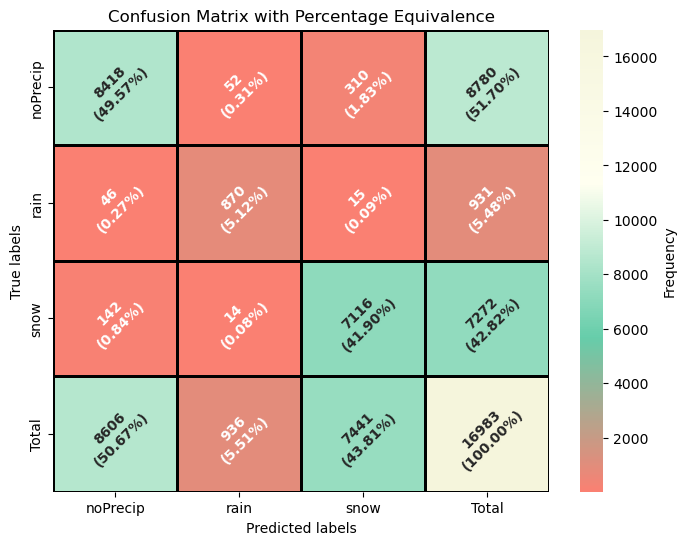

In [19]:
# Add totals for each class
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix_with_totals = np.vstack([conf_matrix, 
                                     np.sum(conf_matrix, axis=0)])
conf_matrix_with_totals = np.hstack([conf_matrix_with_totals, 
                                     np.sum(conf_matrix_with_totals, axis=1).reshape(-1, 1)])

# Assuming conf_matrix_with_totals is defined
# Calculate the percentage equivalence for each value in the confusion matrix
total_samples = np.sum(conf_matrix_with_totals[:-1, :-1])  # Exclude the total row and column
percent_equivalence = conf_matrix_with_totals[:, :] / total_samples * 100

# Create a list to hold the annotations
annotations = []
for i in range(conf_matrix_with_totals.shape[0]):
    for j in range(conf_matrix_with_totals.shape[1]):
        value = conf_matrix_with_totals[i, j]
        # For other cells, display both value and percentage
        percent_value = percent_equivalence[i, j]
        annotations.append(f"{value}\n({percent_value:.2f}%)")

# Reshape the annotations to match the shape of the confusion matrix
annotations = np.array(annotations).reshape(conf_matrix_with_totals.shape)
# Define your custom colors
colors = ['salmon', 'mediumaquamarine', 'ivory', 'beige']  # You can define your own list of colors here

# Create a continuous colormap by interpolating between the colors
cmap = plt.cm.colors.LinearSegmentedColormap.from_list('custom', colors)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_with_totals, annot=annotations, fmt='', cmap=cmap, 
            xticklabels=['noPrecip', 'rain', 'snow', 'Total'],
            yticklabels=['noPrecip', 'rain', 'snow', 'Total'],
            linewidths=1, linecolor='black', annot_kws={"fontsize": 10, 
                                 "fontweight": "bold", "rotation": 45},
                             cbar_kws={"label": "Frequency"})  # Adding gridlines

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with Percentage Equivalence')
plt.show()

## Fit model for land

In [20]:
# Now its time to train the model
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
X = df_req_dic_land[['10v_BT', '10h_BT', '18v_BT', '18h_BT', '23v_BT', '36v_BT', '36h_BT', '89v_BT', '89h_BT', '166v_BT', '166h_BT', '183-3_BT', '183-7_BT']]
y = df_req_dic_land['precip_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create an XGBoost classifier with 200 weak learners
model = XGBClassifier(n_estimators=5000)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract TP, TN, FP, FN for labels 1 and 2
TP_1 = conf_matrix[1, 1]  # True Positive for label 1
TN_1 = conf_matrix[0, 0] + conf_matrix[0, 2] + conf_matrix[2, 0] + conf_matrix[2, 2]  # True Negative for label 1
FP_1 = conf_matrix[0, 1] + conf_matrix[2, 1]  # False Positive for label 1
FN_1 = conf_matrix[1, 0] + conf_matrix[1, 2]  # False Negative for label 1

TP_2 = conf_matrix[2, 2]  # True Positive for label 2
TN_2 = conf_matrix[0, 0] + conf_matrix[0, 1] + conf_matrix[1, 0] + conf_matrix[1, 1]  # True Negative for label 2
FP_2 = conf_matrix[0, 2] + conf_matrix[1, 2]  # False Positive for label 2
FN_2 = conf_matrix[2, 0] + conf_matrix[2, 1]  # False Negative for label 2

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR) for labels 1 and 2
TPR_1 = TP_1 / (TP_1 + FN_1)
FPR_1 = FP_1 / (FP_1 + TN_1)

TPR_2 = TP_2 / (TP_2 + FN_2)
FPR_2 = FP_2 / (FP_2 + TN_2)

# Print the results
print(f"Label 1 - TPR: {TPR_1}, FPR: {FPR_1}")
print(f"Label 2 - TPR: {TPR_2}, FPR: {FPR_2}")

Label 1 - TPR: 0.9627049775068931, FPR: 0.05176470588235294
Label 2 - TPR: 0.9533437013996889, FPR: 0.0025832576974097604


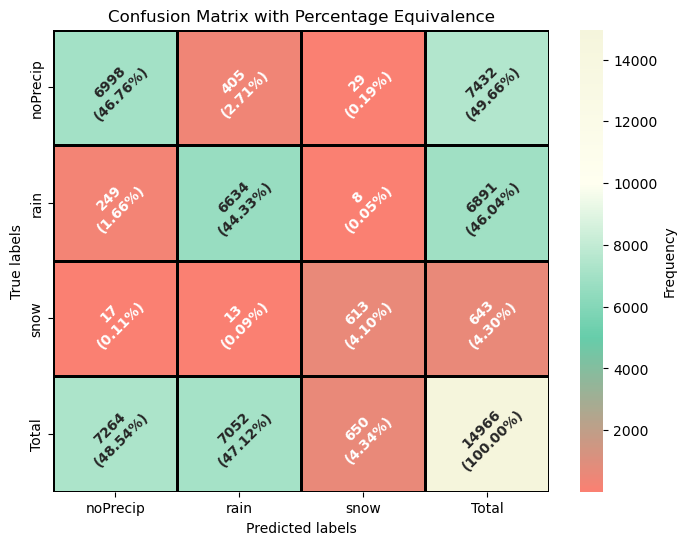

In [22]:
# Add totals for each class
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix_with_totals = np.vstack([conf_matrix, 
                                     np.sum(conf_matrix, axis=0)])
conf_matrix_with_totals = np.hstack([conf_matrix_with_totals, 
                                     np.sum(conf_matrix_with_totals, axis=1).reshape(-1, 1)])

# Assuming conf_matrix_with_totals is defined
# Calculate the percentage equivalence for each value in the confusion matrix
total_samples = np.sum(conf_matrix_with_totals[:-1, :-1])  # Exclude the total row and column
percent_equivalence = conf_matrix_with_totals[:, :] / total_samples * 100

# Create a list to hold the annotations
annotations = []
for i in range(conf_matrix_with_totals.shape[0]):
    for j in range(conf_matrix_with_totals.shape[1]):
        value = conf_matrix_with_totals[i, j]
        # For other cells, display both value and percentage
        percent_value = percent_equivalence[i, j]
        annotations.append(f"{value}\n({percent_value:.2f}%)")

# Reshape the annotations to match the shape of the confusion matrix
annotations = np.array(annotations).reshape(conf_matrix_with_totals.shape)
# Define your custom colors
colors = ['salmon', 'mediumaquamarine', 'ivory', 'beige']  # You can define your own list of colors here

# Create a continuous colormap by interpolating between the colors
cmap = plt.cm.colors.LinearSegmentedColormap.from_list('custom', colors)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_with_totals, annot=annotations, fmt='', cmap=cmap, 
            xticklabels=['noPrecip', 'rain', 'snow', 'Total'],
            yticklabels=['noPrecip', 'rain', 'snow', 'Total'],
            linewidths=1, linecolor='black', annot_kws={"fontsize": 10, 
                                 "fontweight": "bold", "rotation": 45},
                             cbar_kws={"label": "Frequency"})  # Adding gridlines

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with Percentage Equivalence')
plt.show()

## Model training for seaIce

In [25]:
# Now its time to train the model
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
X = df_req_dic_seaIce[['10v_BT', '10h_BT', '18v_BT', '18h_BT', '23v_BT', '36v_BT', '36h_BT', '89v_BT', '89h_BT', '166v_BT', '166h_BT', '183-3_BT', '183-7_BT']]
y = df_req_dic_seaIce['precip_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create an XGBoost classifier with 200 weak learners
model = XGBClassifier(n_estimators=5000)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract TP, TN, FP, FN for labels 1 and 2
TP_1 = conf_matrix[1, 1]  # True Positive for label 1
TN_1 = conf_matrix[0, 0] + conf_matrix[0, 2] + conf_matrix[2, 0] + conf_matrix[2, 2]  # True Negative for label 1
FP_1 = conf_matrix[0, 1] + conf_matrix[2, 1]  # False Positive for label 1
FN_1 = conf_matrix[1, 0] + conf_matrix[1, 2]  # False Negative for label 1

TP_2 = conf_matrix[2, 2]  # True Positive for label 2
TN_2 = conf_matrix[0, 0] + conf_matrix[0, 1] + conf_matrix[1, 0] + conf_matrix[1, 1]  # True Negative for label 2
FP_2 = conf_matrix[0, 2] + conf_matrix[1, 2]  # False Positive for label 2
FN_2 = conf_matrix[2, 0] + conf_matrix[2, 1]  # False Negative for label 2

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR) for labels 1 and 2
TPR_1 = TP_1 / (TP_1 + FN_1)
FPR_1 = FP_1 / (FP_1 + TN_1)

TPR_2 = TP_2 / (TP_2 + FN_2)
FPR_2 = FP_2 / (FP_2 + TN_2)

# Print the results
print(f"Label 1 - TPR: {TPR_1}, FPR: {FPR_1}")
print(f"Label 2 - TPR: {TPR_2}, FPR: {FPR_2}")

Label 1 - TPR: 0.952, FPR: 0.0014685946678716674
Label 2 - TPR: 0.9845775592311131, FPR: 0.04170267934312878


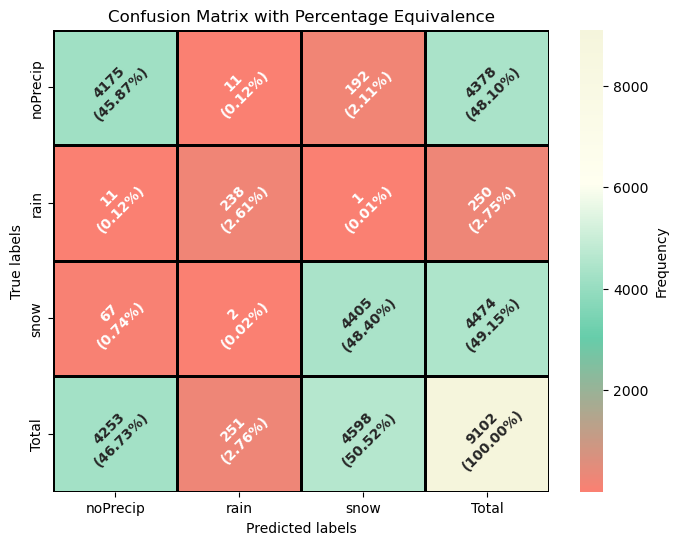

In [27]:
# Add totals for each class
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix_with_totals = np.vstack([conf_matrix, 
                                     np.sum(conf_matrix, axis=0)])
conf_matrix_with_totals = np.hstack([conf_matrix_with_totals, 
                                     np.sum(conf_matrix_with_totals, axis=1).reshape(-1, 1)])

# Assuming conf_matrix_with_totals is defined
# Calculate the percentage equivalence for each value in the confusion matrix
total_samples = np.sum(conf_matrix_with_totals[:-1, :-1])  # Exclude the total row and column
percent_equivalence = conf_matrix_with_totals[:, :] / total_samples * 100

# Create a list to hold the annotations
annotations = []
for i in range(conf_matrix_with_totals.shape[0]):
    for j in range(conf_matrix_with_totals.shape[1]):
        value = conf_matrix_with_totals[i, j]
        # For other cells, display both value and percentage
        percent_value = percent_equivalence[i, j]
        annotations.append(f"{value}\n({percent_value:.2f}%)")

# Reshape the annotations to match the shape of the confusion matrix
annotations = np.array(annotations).reshape(conf_matrix_with_totals.shape)
# Define your custom colors
colors = ['salmon', 'mediumaquamarine', 'ivory', 'beige']  # You can define your own list of colors here

# Create a continuous colormap by interpolating between the colors
cmap = plt.cm.colors.LinearSegmentedColormap.from_list('custom', colors)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_with_totals, annot=annotations, fmt='', cmap=cmap, 
            xticklabels=['noPrecip', 'rain', 'snow', 'Total'],
            yticklabels=['noPrecip', 'rain', 'snow', 'Total'],
            linewidths=1, linecolor='black', annot_kws={"fontsize": 10, 
                                 "fontweight": "bold", "rotation": 45},
                             cbar_kws={"label": "Frequency"})  # Adding gridlines

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with Percentage Equivalence')
plt.show()

## model training ocean

In [31]:
# Now its time to train the model
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
X = df_req_dic_ocean[['10v_BT', '10h_BT', '18v_BT', '18h_BT', '23v_BT', '36v_BT', '36h_BT', '89v_BT', '89h_BT', '166v_BT', '166h_BT', '183-3_BT', '183-7_BT']]
y = df_req_dic_ocean['precip_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create an XGBoost classifier with 200 weak learners
model = XGBClassifier(n_estimators=5000)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract TP, TN, FP, FN for labels 1 and 2
TP_1 = conf_matrix[1, 1]  # True Positive for label 1
TN_1 = conf_matrix[0, 0] + conf_matrix[0, 2] + conf_matrix[2, 0] + conf_matrix[2, 2]  # True Negative for label 1
FP_1 = conf_matrix[0, 1] + conf_matrix[2, 1]  # False Positive for label 1
FN_1 = conf_matrix[1, 0] + conf_matrix[1, 2]  # False Negative for label 1

TP_2 = conf_matrix[2, 2]  # True Positive for label 2
TN_2 = conf_matrix[0, 0] + conf_matrix[0, 1] + conf_matrix[1, 0] + conf_matrix[1, 1]  # True Negative for label 2
FP_2 = conf_matrix[0, 2] + conf_matrix[1, 2]  # False Positive for label 2
FN_2 = conf_matrix[2, 0] + conf_matrix[2, 1]  # False Negative for label 2

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR) for labels 1 and 2
TPR_1 = TP_1 / (TP_1 + FN_1)
FPR_1 = FP_1 / (FP_1 + TN_1)

TPR_2 = TP_2 / (TP_2 + FN_2)
FPR_2 = FP_2 / (FP_2 + TN_2)

# Print the results
print(f"Label 1 - TPR: {TPR_1}, FPR: {FPR_1}")
print(f"Label 2 - TPR: {TPR_2}, FPR: {FPR_2}")

Label 1 - TPR: 0.9718793797187938, FPR: 0.028108074456826247
Label 2 - TPR: 0.9826057869208897, FPR: 0.006443459163800605


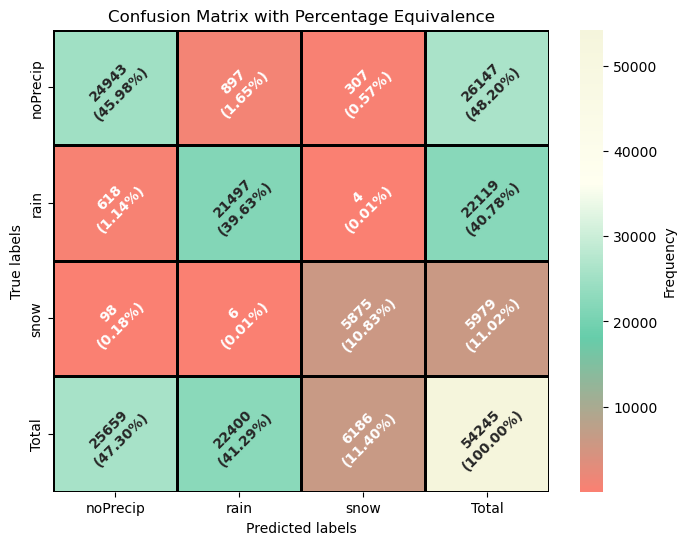

In [33]:
# Add totals for each class
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix_with_totals = np.vstack([conf_matrix, 
                                     np.sum(conf_matrix, axis=0)])
conf_matrix_with_totals = np.hstack([conf_matrix_with_totals, 
                                     np.sum(conf_matrix_with_totals, axis=1).reshape(-1, 1)])

# Assuming conf_matrix_with_totals is defined
# Calculate the percentage equivalence for each value in the confusion matrix
total_samples = np.sum(conf_matrix_with_totals[:-1, :-1])  # Exclude the total row and column
percent_equivalence = conf_matrix_with_totals[:, :] / total_samples * 100

# Create a list to hold the annotations
annotations = []
for i in range(conf_matrix_with_totals.shape[0]):
    for j in range(conf_matrix_with_totals.shape[1]):
        value = conf_matrix_with_totals[i, j]
        # For other cells, display both value and percentage
        percent_value = percent_equivalence[i, j]
        annotations.append(f"{value}\n({percent_value:.2f}%)")

# Reshape the annotations to match the shape of the confusion matrix
annotations = np.array(annotations).reshape(conf_matrix_with_totals.shape)
# Define your custom colors
colors = ['salmon', 'mediumaquamarine', 'ivory', 'beige']  # You can define your own list of colors here

# Create a continuous colormap by interpolating between the colors
cmap = plt.cm.colors.LinearSegmentedColormap.from_list('custom', colors)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_with_totals, annot=annotations, fmt='', cmap=cmap, 
            xticklabels=['noPrecip', 'rain', 'snow', 'Total'],
            yticklabels=['noPrecip', 'rain', 'snow', 'Total'],
            linewidths=1, linecolor='black', annot_kws={"fontsize": 10, 
                                 "fontweight": "bold", "rotation": 45},
                             cbar_kws={"label": "Frequency"})  # Adding gridlines

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with Percentage Equivalence')
plt.show()

## model training coast

In [34]:
# Now its time to train the model
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
X = df_req_dic_coast[['10v_BT', '10h_BT', '18v_BT', '18h_BT', '23v_BT', '36v_BT', '36h_BT', '89v_BT', '89h_BT', '166v_BT', '166h_BT', '183-3_BT', '183-7_BT']]
y = df_req_dic_coast['precip_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create an XGBoost classifier with 200 weak learners
model = XGBClassifier(n_estimators=5000)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract TP, TN, FP, FN for labels 1 and 2
TP_1 = conf_matrix[1, 1]  # True Positive for label 1
TN_1 = conf_matrix[0, 0] + conf_matrix[0, 2] + conf_matrix[2, 0] + conf_matrix[2, 2]  # True Negative for label 1
FP_1 = conf_matrix[0, 1] + conf_matrix[2, 1]  # False Positive for label 1
FN_1 = conf_matrix[1, 0] + conf_matrix[1, 2]  # False Negative for label 1

TP_2 = conf_matrix[2, 2]  # True Positive for label 2
TN_2 = conf_matrix[0, 0] + conf_matrix[0, 1] + conf_matrix[1, 0] + conf_matrix[1, 1]  # True Negative for label 2
FP_2 = conf_matrix[0, 2] + conf_matrix[1, 2]  # False Positive for label 2
FN_2 = conf_matrix[2, 0] + conf_matrix[2, 1]  # False Negative for label 2

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR) for labels 1 and 2
TPR_1 = TP_1 / (TP_1 + FN_1)
FPR_1 = FP_1 / (FP_1 + TN_1)

TPR_2 = TP_2 / (TP_2 + FN_2)
FPR_2 = FP_2 / (FP_2 + TN_2)

# Print the results
print(f"Label 1 - TPR: {TPR_1}, FPR: {FPR_1}")
print(f"Label 2 - TPR: {TPR_2}, FPR: {FPR_2}")

Label 1 - TPR: 0.9773242630385488, FPR: 0.04311152764761012
Label 2 - TPR: 0.9688581314878892, FPR: 0.0036021058464948737


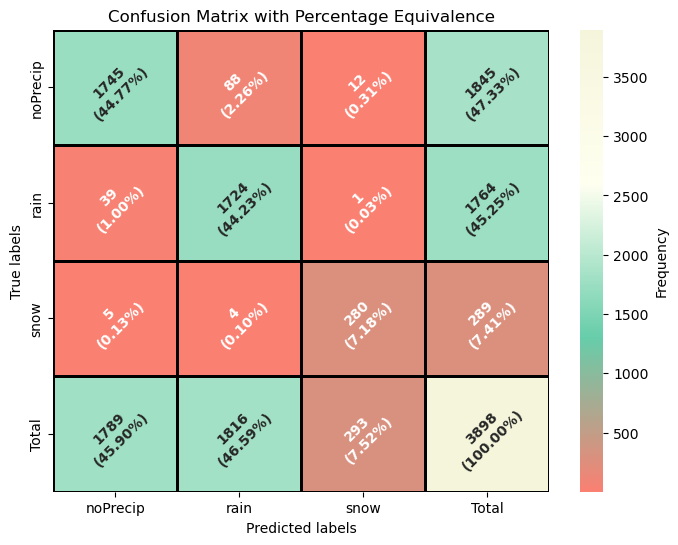

In [36]:
# Add totals for each class
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix_with_totals = np.vstack([conf_matrix, 
                                     np.sum(conf_matrix, axis=0)])
conf_matrix_with_totals = np.hstack([conf_matrix_with_totals, 
                                     np.sum(conf_matrix_with_totals, axis=1).reshape(-1, 1)])

# Assuming conf_matrix_with_totals is defined
# Calculate the percentage equivalence for each value in the confusion matrix
total_samples = np.sum(conf_matrix_with_totals[:-1, :-1])  # Exclude the total row and column
percent_equivalence = conf_matrix_with_totals[:, :] / total_samples * 100

# Create a list to hold the annotations
annotations = []
for i in range(conf_matrix_with_totals.shape[0]):
    for j in range(conf_matrix_with_totals.shape[1]):
        value = conf_matrix_with_totals[i, j]
        # For other cells, display both value and percentage
        percent_value = percent_equivalence[i, j]
        annotations.append(f"{value}\n({percent_value:.2f}%)")

# Reshape the annotations to match the shape of the confusion matrix
annotations = np.array(annotations).reshape(conf_matrix_with_totals.shape)
# Define your custom colors
colors = ['salmon', 'mediumaquamarine', 'ivory', 'beige']  # You can define your own list of colors here

# Create a continuous colormap by interpolating between the colors
cmap = plt.cm.colors.LinearSegmentedColormap.from_list('custom', colors)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_with_totals, annot=annotations, fmt='', cmap=cmap, 
            xticklabels=['noPrecip', 'rain', 'snow', 'Total'],
            yticklabels=['noPrecip', 'rain', 'snow', 'Total'],
            linewidths=1, linecolor='black', annot_kws={"fontsize": 10, 
                                 "fontweight": "bold", "rotation": 45},
                             cbar_kws={"label": "Frequency"})  # Adding gridlines

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with Percentage Equivalence')
plt.show()